In [7]:
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
from datetime import datetime

In [9]:
url = ["https://apps.apple.com/us/app/go-kinetic-by-windstream/id1342262959", #GoKinectByWindstream
    "https://apps.apple.com/us/app/my-altafiber/id1245014739", #MyAltafiber
    "https://apps.apple.com/us/app/spectrum-access-enabled-media/id1492182876", #SpectrumAccess
    "https://apps.apple.com/us/app/cox-app/id415894489", #CoxApp
    "https://apps.apple.com/us/app/my-verizon/id416023011", #MyVerizon
    "https://apps.apple.com/us/app/mycricket-app/id626392754", #MyCricket
    "https://apps.apple.com/us/app/mydish-account/id1123102087", #MyDishAccount
    "https://apps.apple.com/us/app/t-mobile/id561625752", #T-Mobile
    "https://apps.apple.com/us/app/xfinity-mobile/id1194745615", #XfinityMobile
    "https://apps.apple.com/us/app/spectrum-news-local-stories/id740948885", #SpectrumNews
    "https://apps.apple.com/us/app/my-spectrum/id942608209", #MySpectrumApp
    "https://apps.apple.com/us/app/my-sprint-mobile/id491126018", #MySprintMobile
    "https://apps.apple.com/us/app/verizon-my-fios/id476394945", #VerizonMyFios
    "https://apps.apple.com/us/app/my-centurylink/id1015059570", #MyCenturyLink
    "https://apps.apple.com/us/app/visible-mobile/id1367950045", #VisibleMobile
    "https://apps.apple.com/us/app/spectrumu/id827887111", #SpectrumU
    "https://apps.apple.com/us/app/spectrum-tv/id420455839", #SpectrumTV
    "https://apps.apple.com/us/app/myat-t/id309172177", #MyATT
    "https://apps.apple.com/us/app/spectrum-sportsnet-live-games/id563316826", #SpectrumSportsNet
    "https://apps.apple.com/us/app/mediacomconnect/id527680234", #MediacomConnect
    "https://apps.apple.com/us/app/mymetro/id1188830219", #MyMetro
    "https://apps.apple.com/us/app/myfrontier/id978439794", #MyFrontier
    "https://apps.apple.com/us/app/xfinity/id1178765645", #XfinityMyAccount
    "https://apps.apple.com/us/app/google-fiber/id1063844759", #GoogleFiber
    "https://apps.apple.com/us/app/my-viasat/id1341120640", #MyViasat
    "https://apps.apple.com/us/app/armstrong/id636522134", #ArmStrong
    "https://apps.apple.com/us/app/rcn-mobile/id610411414", #RCN_Mobile
    "https://apps.apple.com/us/app/hughesnet-mobile/id1097579916", #HughesNet_Mobile
    "https://apps.apple.com/us/app/ht-my-account/id1262963153", #HT_MyAccount
    "https://apps.apple.com/us/app/midco-my-account/id1090421908", #MidcoMyAccount
    "https://apps.apple.com/us/app/optimum-support/id1234273194", #OptimumSupport
    "https://apps.apple.com/us/app/uscellular-my-account/id1228669675", #US_Cellular_My_Account
    "https://apps.apple.com/us/app/my-sectv/id898376931", #MySecTV
    "https://apps.apple.com/us/app/optimum-tv/id1296704509", #OptimumTV
    "https://apps.apple.com/us/app/breezeline-tv/id787428890", #BreezelineTV
    "https://apps.apple.com/us/app/my-blue-ridge/id1425929491", #MyBlueRidge
    "https://apps.apple.com/us/app/mybuckeye/id1571340716" #MyBuckeye
]
dataiOS = []
for link in range(len(url)):
    result = requests.get(url[link])
    soup = BeautifulSoup(result.content, "html.parser")
    rank_element = soup.find('a',{'class': 'inline-list__item'})
    rank = None
    if rank_element is not None:
        rank_text = rank_element.text.strip()
        rank_text = rank_text.split()[0]
        rank = int(rank_text.replace(',','').replace('#',''))
    script = soup.find(type="application/ld+json").text.strip()
    data = json.loads(script)
    dataApp = {
    "App Name": data['name'], 
    "App Rating": data['aggregateRating']['ratingValue'], 
    "Review Count": data['aggregateRating']['reviewCount'],
    "Rank": rank
    }
    dataiOS.append(dataApp)
dataiOS = pd.DataFrame(dataiOS)

now = datetime.now()
dataiOS.insert(0, 'Date', now.strftime("%Y-%m-%d %H:%M:%S"))

print(dataiOS)
dataiOS.to_excel('iOSratings.xlsx')

                   Date                        App Name  App Rating  \
0   2023-04-27 13:33:52        Go Kinetic by Windstream         4.8   
1   2023-04-27 13:33:52                    My altafiber         4.8   
2   2023-04-27 13:33:52  Spectrum Access: Enabled Media         4.6   
3   2023-04-27 13:33:52                         Cox App         4.6   
4   2023-04-27 13:33:52                      My Verizon         4.6   
5   2023-04-27 13:33:52                   myCricket App         4.5   
6   2023-04-27 13:33:52                  MyDISH Account         4.6   
7   2023-04-27 13:33:52                        T-Mobile         4.8   
8   2023-04-27 13:33:52                  Xfinity Mobile         4.8   
9   2023-04-27 13:33:52    Spectrum News: Local Stories         4.7   
10  2023-04-27 13:33:52                     My Spectrum         4.8   
11  2023-04-27 13:33:52                My Sprint Mobile         4.5   
12  2023-04-27 13:33:52                 Verizon My Fios         4.5   
13  20

In [15]:
urlAndroid = ["https://play.google.com/store/apps/details?id=com.altafiber.myaltafiber&hl=en_US&gl=US" #MyAltaFiber
             
              
              
              
]
dataAndroid = []
for link in range(len(urlAndroid)):
    resultAndroid = requests.get(urlAndroid[link])
    soupAndroid = BeautifulSoup(resultAndroid.content, "html.parser")
    starRatingRaw = soupAndroid.find("div",{"aria-label":"Rated 4.6 stars out of five stars"})
    starRating = starRatingRaw.text.replace("star","")
    
    appName = soupAndroid.find("h1",{"class":"Fd93Bb ynrBgc xwcR9d"})
    appName = appName.text
    
    temp_list = []
    divReviews= soupAndroid.find_all("div",{"class":"RutFAf wcB8se"})
    for div in divReviews:
        countReviewsRaw = div['title']
        countReviews = countReviewsRaw.replace(",","")
        temp_list.append(countReviews)
    
    temp_list.append(starRating)
    temp_list.append(appName)
    dataAndroid.append(temp_list)
    
dataAndroid = pd.DataFrame(dataAndroid, columns=['5 Star Reviews', '4 Star Reviews', '3 Star Reviews', '2 Star Reviews', '1 Star Reviews', 'Star Rating', 'App Name'])

dataAndroid['5 Star Reviews'] = dataAndroid['5 Star Reviews'].astype(int)
dataAndroid['4 Star Reviews'] = dataAndroid['4 Star Reviews'].astype(int)
dataAndroid['3 Star Reviews'] = dataAndroid['3 Star Reviews'].astype(int)
dataAndroid['2 Star Reviews'] = dataAndroid['2 Star Reviews'].astype(int)
dataAndroid['1 Star Reviews'] = dataAndroid['1 Star Reviews'].astype(int)
dataAndroid['Total Reviews'] = dataAndroid.loc[:, '5 Star Reviews':'1 Star Reviews'].sum(1)

dataAndroid = dataAndroid[['App Name', 'Star Rating', 'Total Reviews', '5 Star Reviews','4 Star Reviews', '3 Star Reviews', '2 Star Reviews', '1 Star Reviews']]

now = datetime.now()
dataAndroid.insert(0, 'Date', now.strftime("%Y-%m-%d %H:%M:%S"))

print(dataAndroid)


AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
#import sqlite3
#conn = sqlite3.connect("App_store_ratings.db")

#Create cursor object
#c = conn.cursor()
#Executve SQL
#dataAndroid.to_sql('Android_App_Ratings', conn, if_exists='append', index=False)
#Commit Changes
#conn.commit()
#conn.close()



<!DOCTYPE html>
<html dir="ltr" lang="en-US"><head><base href="https://play.google.com/"/><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="yes" name="mobile-web-app-capable"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="sBw2N8uateIzRr93vmFze5MF_35vMk5F1wG04L5JcJE" name="google-site-verification"/><meta content="PJKdyVFC5jlu_l8Wo_hirJkhs1cmitmn44fgpOc3zFc" name="google-site-verification"/><link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/><link href="//www.gstatic.com/android/market_images/web/favicon_v3.ico" rel="shortcut icon"/><script data-id="_gd" nonce="1rMLk-drr-OQjzgVf1bmaA">window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*","/covid19/exposurenotifications/select","/covid19/exposurenotifications/select/*","/exchange","/exchange/*","/store/ereview","/store/ereview/","/store/linkbuilder","/store/linkbuilder/","/store/m
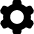
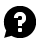
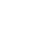
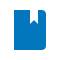
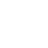
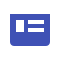
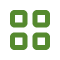
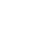
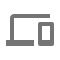
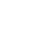
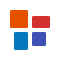
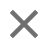
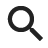
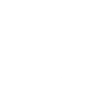
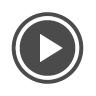

In [11]:
print(soupAndroid)
